In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean as dist
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Demo data from kmeans example:
# http://www.machinelearningtutorial.net/2017/02/14/k-means-clustering-example/

demo_dict = {'X':[1,2,1,4,5],
             'Y':[1,1,2,3,4]}
labels = ['A','B','C','D','E']

demo = pd.DataFrame(demo_dict, index = labels)

X = demo[['X','Y']].to_numpy()
Y = np.array(demo.index)

In [3]:
def kmeans(num_clust, attrib_array):
    
    initial = []    
    # randomly select n=num_clust unique data points from the input data as 
    # starting centroids.
    while len(initial) < num_clust:
        rand = np.random.randint(0,len(attrib_array),1)
        if any((attrib_array[rand] == a).all() for a in initial) == False:
            initial.append(attrib_array[rand])
    
    new_centroids = np.concatenate(initial, axis = 0).astype('float64') #as float64 to allow for decimal centroids
    
    centroids = np.zeros(new_centroids.shape)  # store for centroids of the previous iteration
    
    centroid_diff = np.linalg.norm(new_centroids - centroids, None) #euclid. distance, **swap for euclid dist function.
    
    clusters = np.zeros(len(attrib_array)).astype('float64')
    
    # centroid storing functionality referenced from, some syntax used for clarity
    # https://mubaris.com/2017-10-01/kmeans-clustering-in-python
    while centroid_diff != 0:
        for i in range(len(attrib_array)):
            distance =  np.linalg.norm(attrib_array[i] - new_centroids,axis = 1)
            cluster = np.argmin(distance)
            clusters[i] = cluster
            
        centroids = new_centroids
        
        for i in range(num_clust):
            new_cent_points = [attrib_array[j] for j in range(len(attrib_array)) if clusters[j] == i ]
            new_centroids[i] = np.mean(new_cent_points, axis = 0)
            
        centroid_diff = np.linalg.norm(new_centroids - centroids, None)

    clustersdf = pd.DataFrame(clusters) # optional
    
    return clustersdf, new_centroids, clusters
  

In [4]:
# testing against the demo data

cluster_results, centroids, clusters = kmeans(2,X)

print(cluster_results[0].value_counts())

1.0    3
0.0    2
Name: 0, dtype: int64


In [23]:
"""

testing the algorithm on the iris dataset

"""
iris_data = datasets.load_iris()
X = iris_data.data[:,:]             # features
Y = pd.DataFrame(iris_data.target)  # target classes
Y_labels = iris_data.target_names   # class labels

iris_results, centroids, clusters = kmeans(3,X) #pulling centroids and clusters out of the algorithm for verification

iris_results['true'] = Y # add actual class labels to the df

#aligning kmean classes w/ actual class labels
# referenced from: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(iris_data.target[mask])[0]

print("kmeans model accuracy: " + str(accuracy_score(Y[0], labels)))

kmeans model accuracy: 0.9333333333333333


In [24]:
#confusion matrix of iris results

result_mat = confusion_matrix(Y[0],labels)

print(result_mat)

mat_df = pd.DataFrame(result_mat, index = Y_labels)
mat_df

[[50  0  0]
 [ 0 44  6]
 [ 0  4 46]]


,0,1,2
setosa,50,0,0
versicolor,0,44,6
virginica,0,4,46


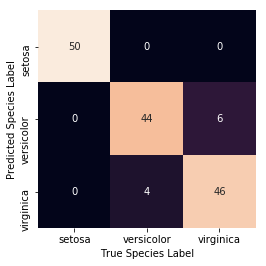

In [25]:
# plot code also referenced from  https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

sns.heatmap(result_mat,
            square = True,
            annot = True,
            fmt = 'd',
            cbar = False,
            xticklabels = iris_data.target_names,
            yticklabels = iris_data.target_names)
plt.xlabel('True Species Label')
plt.ylabel('Predicted Species Label')
plt.show()

Compare to R results obtained using the built-in kmeans function.


<img src=rexample.jpg>